# Cox model execution - 1st article
In this notebook, we test the Cox model for the data from the following article : https://doi.org/10.1158/1078-0432.CCR-20-1163. The metrics we will use here is the Overall Survival (OS).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from survivalAnalysis.CoxModel import CoxModel

In [2]:
coxmodel = CoxModel()

## 1. Reading and preprocessing
We read the ```data/Supplemental-table1.xlsx``` file, and we drop the non-naive patients from the dataframe.

In [3]:
df = pd.read_excel('data/Supplemental-table1.xlsx')
df = df.loc[df["Cohort"] == "Naive"]
df

,Anonymous ID,EGA ID,Tumour type,Sex,Line of therapy,Immunotherapy regimen,Cohort,Reason for discontinuation,Best response,Age at advanced disease diagnosis,...,Alive_0,Time to progression (days),Progression_1,Clinical benefit,CD8+ T cell score,Exome mut per mb,Genome mut per mb,CD274 expression,M1M2 expression,Lymph related
0,14891,EGAD00001001961,LUNG,F,8,Nivolumab,Naive,Progression,Mixed,45,...,1,179,1,NCB,0.351869,11.095310,23.0729,4.1689,55.51575,Non-lymph related
1,18624,EGAD00001002047,AECA,F,10,Nivolumab,Naive,Progression,Stable disease,47,...,1,148,1,NCB,0.071464,3.876336,5.4552,0.7910,9.32352,Non-lymph related
2,21392,EGAD00001002544,OV,F,6,Monalizumab,Naive,Progression,Physician assessed SD,57,...,1,79,1,NCB,0.040394,2.415688,4.1274,4.0377,50.12008,Lymph related
3,21516,EGAD00001002546,SKCM,F,3,Ipilimumab,Naive,Death,Not evaluable,29,...,1,11,0,NCB,0.052774,6.235845,11.4871,0.6006,1.58550,Non-lymph related
4,22186,EGAD00001001966,LUNG,F,4,Atezolizumab,Naive,Progression,Stable disease,52,...,1,80,1,NCB,0.009323,4.606660,7.1503,1.8234,38.42695,Non-lymph related
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,39280,EGAD00001004933,LUNG,M,2,Pembrolizumab,Naive,Toxicity,Physician Assessed SD,60,...,1,401,0,DCB,0.695396,84.998501,96.4079,8.4768,86.62561,Non-lymph related
94,37899,EGAD00001005838,CHOL,F,2,Nivolumab,Naive,Death,Physician assessed PR,38,...,1,96,0,NCB,0.818233,2.247151,2.7416,11.2704,47.97376,Non-lymph related
95,37775,EGAD00001004934,HNSC,M,1,Avelumab/OX40 agonist PF-04518600,Naive,Progression,Stable disease,69,...,1,69,1,NCB,0.018982,3.848247,5.8036,8.7136,5.13403,Non-lymph related
96,38313,EGAD00001005844,ACC,F,3,Avelumab/Debio1143 (SMAC mimetic),Naive,Toxicity,Partial response,34,...,1,51,1,NCB,0.000000,5.617878,7.7940,0.0688,0.51364,Non-lymph related


## 2. Compare high risk patients and low risk patients

### a. Find risk classes
With the ```CoxModel``` class implementing a Cox Regression, we can determine the risk class for each sample : high (class 1) or low (class 0). Because we have few data, we use a **leave one out cross validation**, which consists in fitting the model with all the dataset except 1 sample, then we predict the risk class for the test sample.

In [4]:
# Preprocessing for the label data
X = df.loc[:,["CD8+ T cell score","Exome mut per mb","Genome mut per mb","CD274 expression","M1M2 expression"]].to_numpy()
y = np.array(list((df[['Alive_0','Overall survival (days)']].itertuples(index=False, name=None))),dtype=[('Alive_0', '?'), ('Overall survival (days)', '<f8')])

# Finding the risk classes
risk_classes, risk_scores = coxmodel.leave_one_out_cross_validation(X,y)
print(risk_classes)
print(risk_scores)

[0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
[-1.30539824e+00 -1.35683044e-01 -5.61777266e-02 -3.70384841e-01
 -3.48898336e-02 -4.66706421e-01  2.51379039e-01 -2.96552238e-01
  3.00759991e-02  5.47362269e+00 -8.26419228e-01 -4.04896877e-02
 -4.62695033e-02 -1.92475810e-01 -6.05123967e-01  6.36358883e-02
  5.33425450e-01 -6.99439245e-01 -1.14135947e-01  3.78125634e-01
 -2.01939460e-01 -1.82683658e-01 -6.08211379e-01 -4.25488817e-01
 -9.82793434e-02 -3.80139497e-01  1.54314001e-01 -2.70510677e-01
  2.10151883e-02 -9.21334100e-02 -1.61195279e-01 -3.02490172e-02
 -1.84891208e-02 -4.59999187e-02 -3.22309807e-02 -6.04566291e-01
 -6.18077175e-01 -7.96484108e-01 -8.61081384e-02 -3.76024082e-01
  5.24757828e-01 -9.99136516e-02  5.56777037e-02 -6.99584485e-02
 -5.79686577e-01 -3.21008934e-01 -

### b. Compute concordance index
In this context, the concordance index measures the proportion of patients comparable pairs in which the risk score and the surviving time are concordant.

In [5]:
status, time = df['Alive_0'].to_numpy().astype(bool), df['Overall survival (days)'].to_numpy()
c_index = coxmodel.get_c_index(status, time, risk_scores)
c_index

0.57

### c. Compute p value of the log rank test
The log rank test compares 2 survival curves. If the p value is low (under 5%), the 2 curves are different. Otherwise, the 2 curves are pretty similar. We make this test for the low risk (class 0) and high risk curves (class 1).

In [6]:
p_value = coxmodel.log_rank_test(status.astype(int), time, risk_classes)
p_value

0.02

### d. Vizualize survival curves for each class

In [7]:
# Low risk class
status_low, time_low = status[np.where(risk_classes==0)], time[np.where(risk_classes==0)]
time_axis_low, prob_axis_low = coxmodel.kaplan_meier_estimation(status_low, time_low)

# High risk class
status_high, time_high = status[np.where(risk_classes==1)], time[np.where(risk_classes==1)]
time_axis_high, prob_axis_high = coxmodel.kaplan_meier_estimation(status_high, time_high)

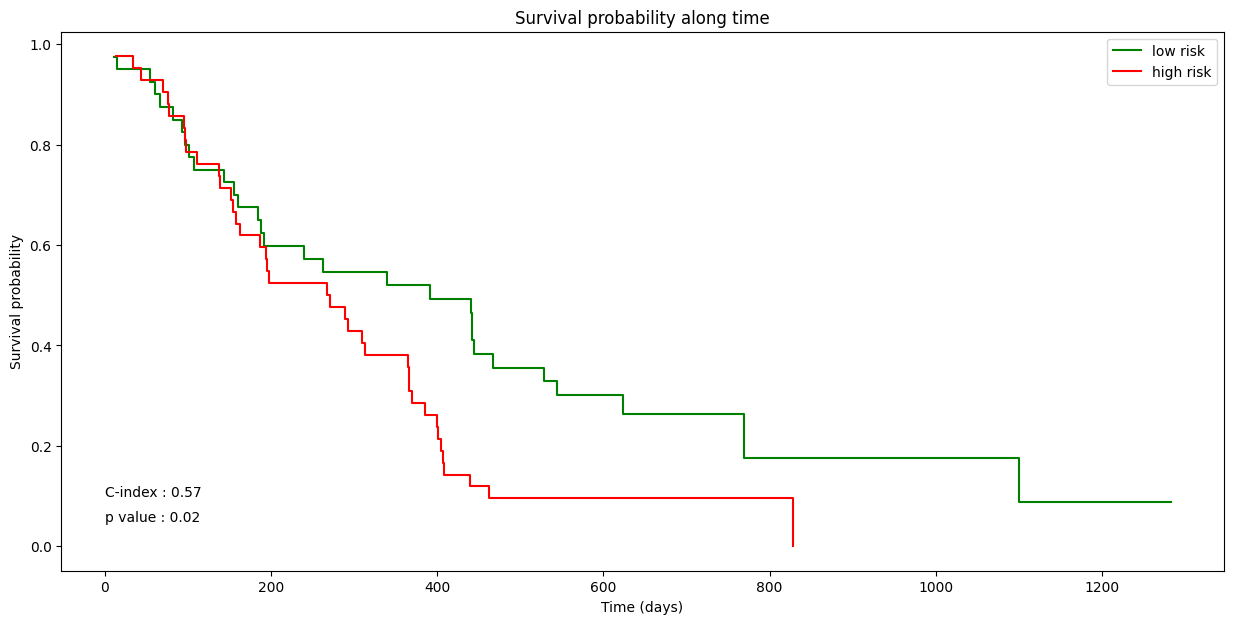

In [8]:
time_axis_low, prob_axis_low = coxmodel.kaplan_meier_estimation(status_low, time_low)

fig, ax = plt.subplots(figsize=(15,7))
ax.step(time_axis_low, prob_axis_low, where='post',color='green',label='low risk')
ax.step(time_axis_high, prob_axis_high, where='post',color='red',label='high risk')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Survival probability')
ax.set_title('Survival probability along time')
ax.text(0,0.1,f'C-index : {c_index}')
ax.text(0,0.05,f'p value : {p_value}')

plt.legend()
plt.savefig('km-survival-curve.png')